In [714]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("earthquake_1995-2023.csv")




In [746]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#df.head()
df

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,6.50,7,4,0,657,114,7.177000,25.00,192.955,-13.8814,167.1580,2023,8,8
1,6.50,8,6,0,775,92,0.679000,40.00,69.727,12.8140,-88.1265,2023,7,8
2,6.60,7,5,0,899,70,1.634000,28.00,171.371,-38.1911,-70.3731,2023,7,8
3,7.20,6,6,1,860,173,0.907000,36.00,32.571,54.3844,-160.6990,2023,7,8
4,7.30,0,5,1,820,79,0.879451,172.80,21.000,54.4900,-160.7960,2023,7,0
5,6.60,5,4,1,802,95,2.454000,37.00,10.000,20.0196,-61.0955,2023,7,8
6,6.90,4,4,1,741,136,1.179000,23.00,229.000,-17.8530,-174.9370,2023,7,8
7,7.20,8,6,1,804,85,2.590000,24.00,167.404,-22.9824,-177.2080,2023,6,8
8,6.60,6,6,1,733,50,2.163000,129.00,10.000,8.8894,-77.1231,2023,5,8
9,7.10,3,4,1,777,98,2.812000,56.00,35.981,-23.0622,170.4560,2023,5,8


In [716]:
# title: título nombre dado al terremoto
# magnitude: La magnitud del terremoto
# date_time: fecha y hora
# cdi: la intensidad máxima reportada para el rango del evento
# mmi: La intensidad instrumental máxima estimada para el evento.
# alert: el nivel de alerta: “verde”, “amarillo”, “naranja” y “rojo”
# tsunami: "1" para eventos en regiones oceánicas y "0" en caso contrario
# sig: un número que describe la importancia del evento. Los números más grandes indican un evento más significativo. Este valor se determina en
#  función de una serie de factores, que incluyen: magnitud, MMI máximo, informes sentidos e impacto estimado.
# net: el ID de un contribuyente de datos. Identifica la red considerada como la fuente de información preferida para este evento.
# nst: El número total de estaciones sismológicas utilizadas para determinar la ubicación del terremoto.
# dmin: Distancia horizontal desde el epicentro hasta la estación más cercana
# gap: la brecha azimutal más grande entre estaciones azimutalmente adyacentes (en grados). En general, cuanto menor sea este número, 
# más fiable será la posición horizontal calculada del terremoto. Los lugares donde se producen terremotos en los que la brecha azimutal 
# supera los 180 grados suelen tener grandes incertidumbres de ubicación y profundidad.
# magType: el método o algoritmo utilizado para calcular la magnitud preferida para el evento
# depth: La profundidad donde el terremoto comienza a romperse
# latitude/longitude: sistema de coordenadas mediante el cual se puede determinar y describir la posición o ubicación de cualquier lugar de 
# la superficie terrestre
# location: ubicación dentro del país
# continent: continente del país afectado por el terremoto
# country: país afectado

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [718]:
df.shape

(1000, 19)

In [719]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [720]:
df.isnull().sum()/df.shape[0]*100

title         0.0
magnitude     0.0
date_time     0.0
cdi           0.0
mmi           0.0
alert        55.1
tsunami       0.0
sig           0.0
net           0.0
nst           0.0
dmin          0.0
gap           0.0
magType       0.0
depth         0.0
latitude      0.0
longitude     0.0
location      0.6
continent    71.6
country      34.9
dtype: float64

In [721]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

Limpia columnas irrelevantes para la clasificación

In [722]:

df.drop(['title', 'continent', 'alert','location'],axis=1,inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country
0,6.5,16-08-2023 12:47,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu
1,6.5,19-07-2023 00:22,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN
2,6.6,17-07-2023 03:05,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina
3,7.2,16-07-2023 06:48,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN
4,7.3,16-07-2023 06:48,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN


In [723]:
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_35684\3140321069.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time']=pd.to_datetime(df['date_time'])


In [724]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,NaN,2023,7


In [725]:
df.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
country      349
Year           0
Month          0
dtype: int64

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   net        1000 non-null   object 
 6   nst        1000 non-null   int64  
 7   dmin       1000 non-null   float64
 8   gap        1000 non-null   float64
 9   magType    1000 non-null   object 
 10  depth      1000 non-null   float64
 11  latitude   1000 non-null   float64
 12  longitude  1000 non-null   float64
 13  country    651 non-null    object 
 14  Year       1000 non-null   int32  
 15  Month      1000 non-null   int32  
dtypes: float64(6), int32(2), int64(5), object(3)
memory usage: 117.3+ KB


EDA

In [727]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

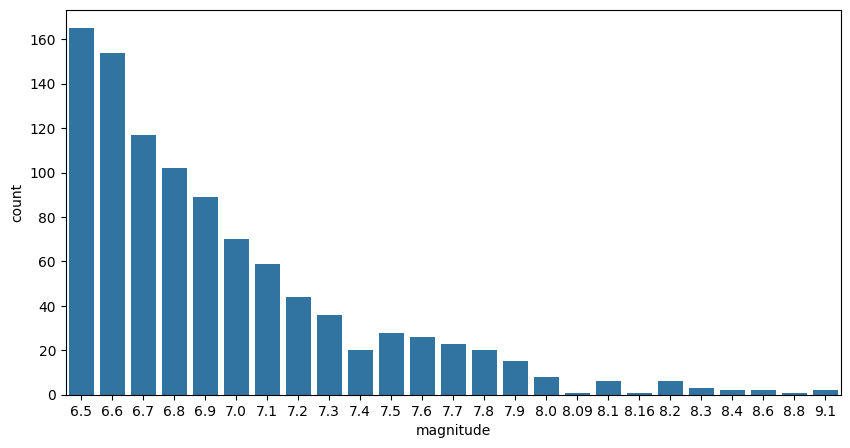

In [728]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale


Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

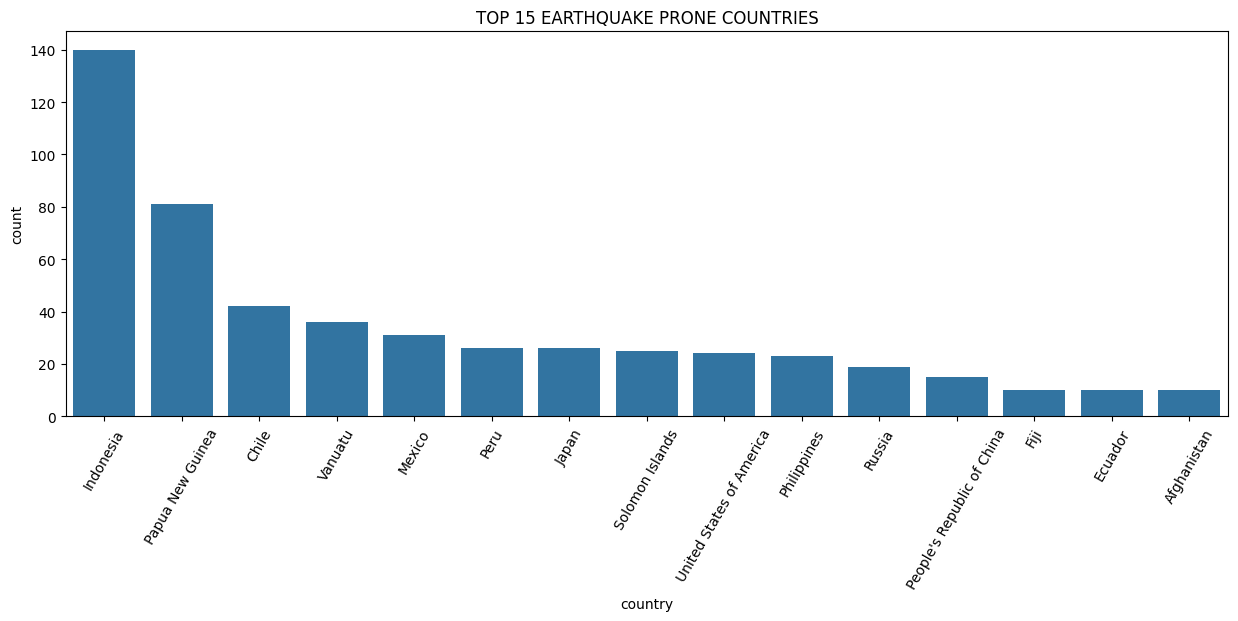

In [729]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'PROBABILIDAD DE TSUNAMI EN LOS 10 PAÍSES PRINCIPALES PROPENSOS A TERREMOTOS')

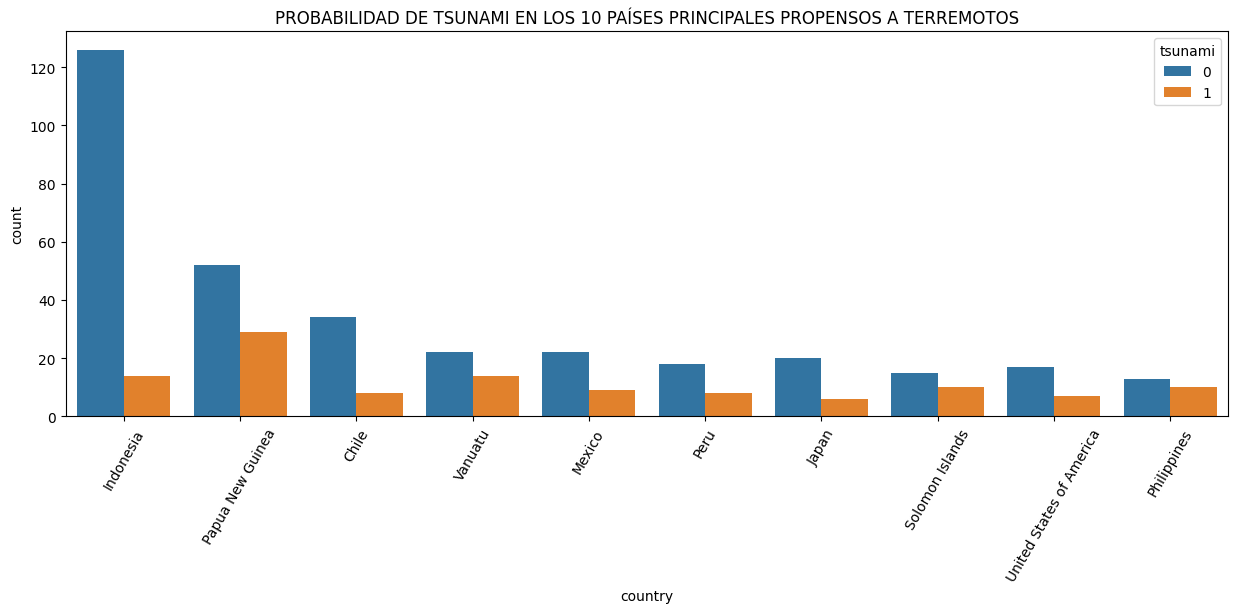

In [730]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('PROBABILIDAD DE TSUNAMI EN LOS 10 PAÍSES PRINCIPALES PROPENSOS A TERREMOTOS')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.


<Axes: xlabel='sig', ylabel='magnitude'>

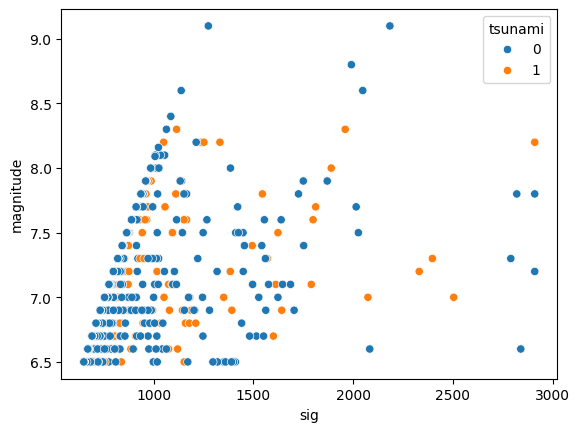

In [731]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'Tsunami Distribution')

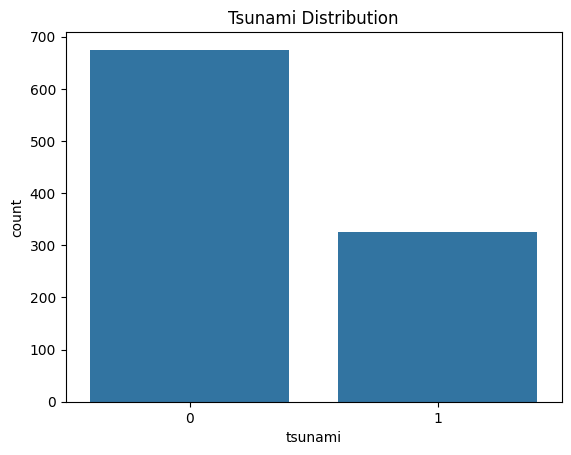

In [732]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

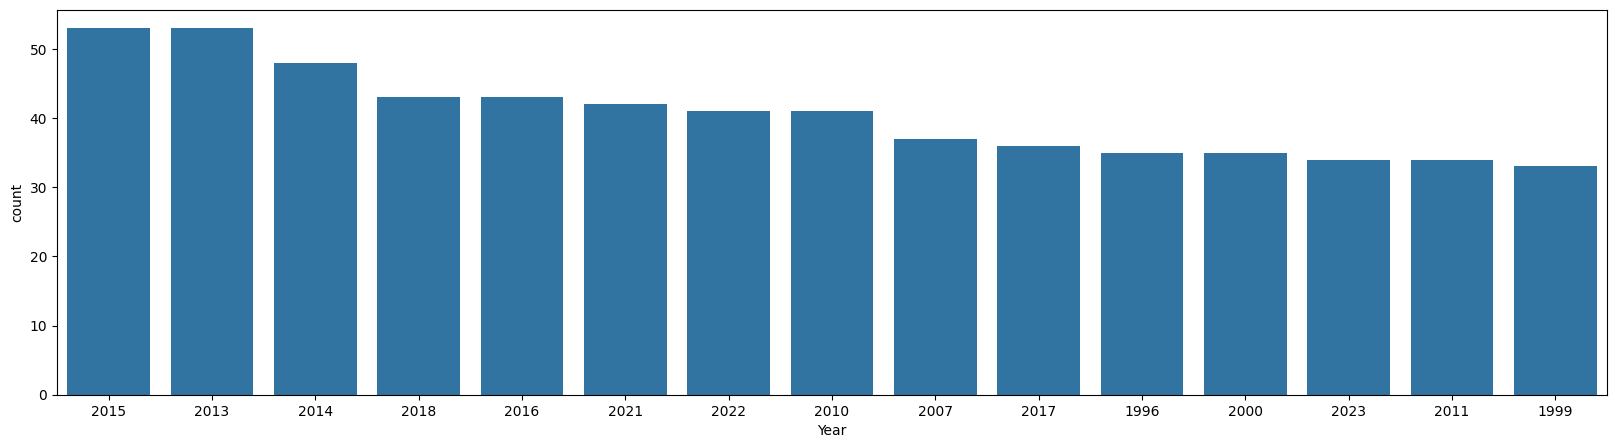

In [733]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')

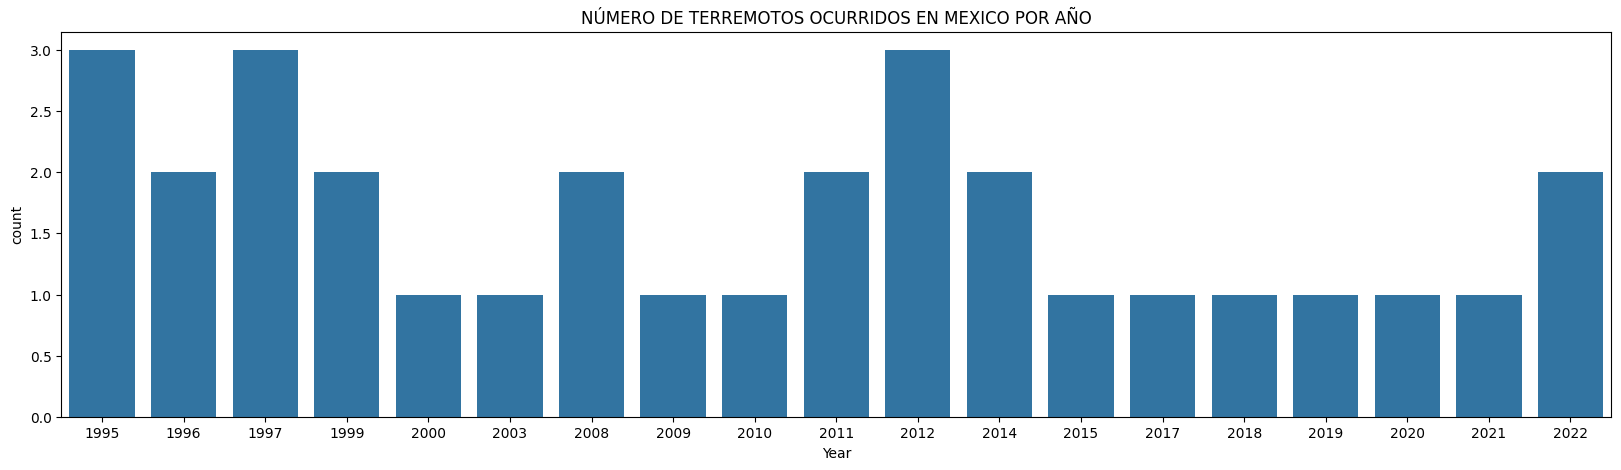

In [734]:
Indo=df[df['country']=='Mexico']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Indo)
plt.title('NÚMERO DE TERREMOTOS OCURRIDOS EN MEXICO POR AÑO')
#Indonesia encountered 13 earthquic in the year 2007

In [735]:
df.drop('country',axis=1,inplace=True)#we have latitude and longitude

In [736]:
obj=df.select_dtypes(include=['object'])
obj.head()
#we can drop net because 95% of data contributed by US 

,net,magType
0,us,mww
1,us,mww
2,us,mww
3,us,mww
4,at,Mi


In [737]:
obj.nunique()

net        11
magType     9
dtype: int64

In [738]:
obj.drop('net',axis=1,inplace=True)
df.drop(['net','magType'],axis=1,inplace=True)
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,magType
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,2023,8,8
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,2023,7,8
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,2023,7,8
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,2023,7,8
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,2023,7,0


<Axes: >

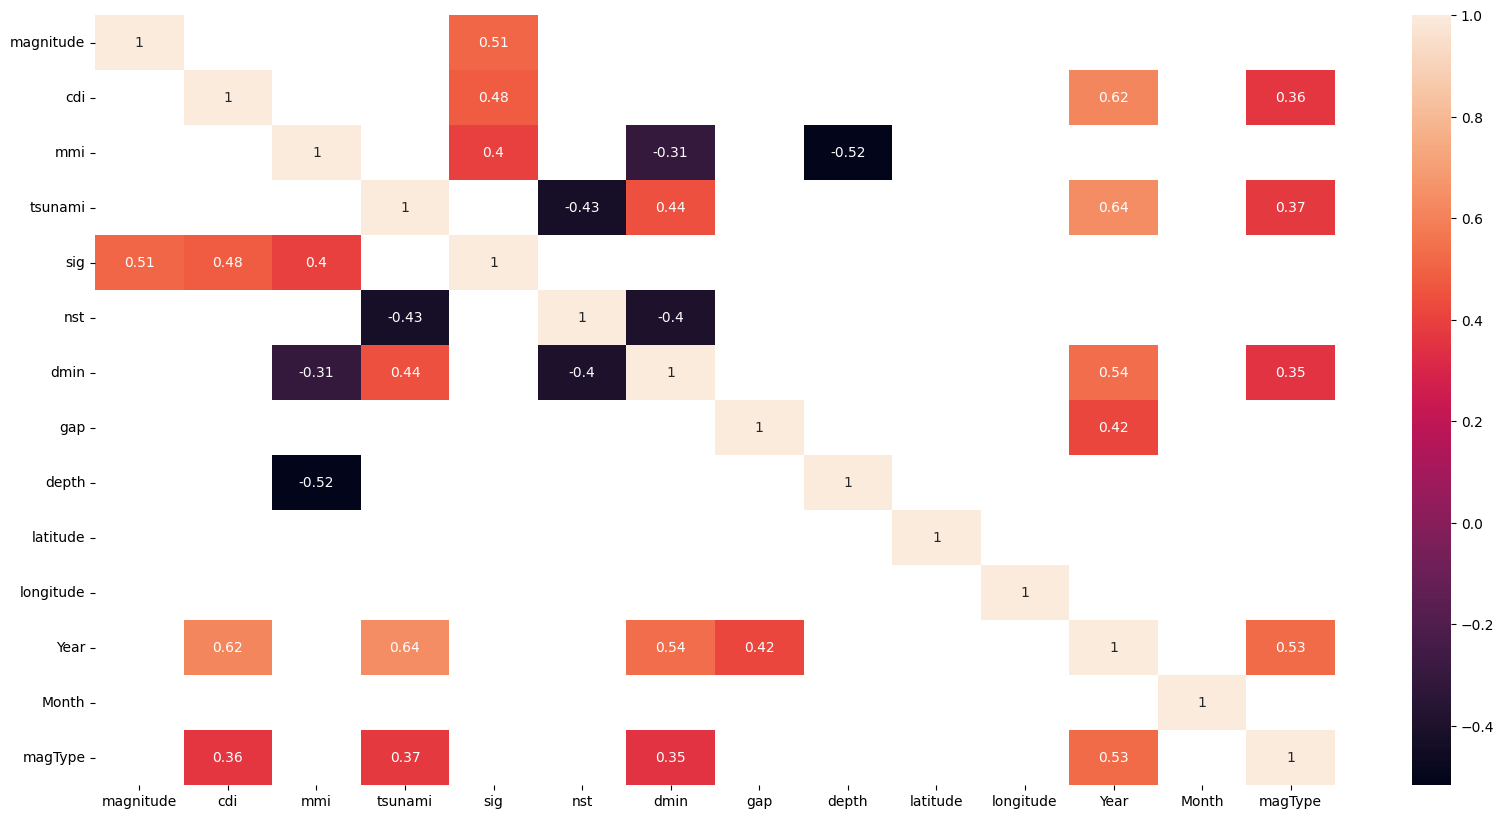

In [739]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

In [740]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   nst        1000 non-null   int64  
 6   dmin       1000 non-null   float64
 7   gap        1000 non-null   float64
 8   depth      1000 non-null   float64
 9   latitude   1000 non-null   float64
 10  longitude  1000 non-null   float64
 11  Year       1000 non-null   int32  
 12  Month      1000 non-null   int32  
 13  magType    1000 non-null   int64  
dtypes: float64(6), int32(2), int64(6)
memory usage: 101.7 KB


In [741]:
# Seleccionar variables (X) y objetivo (y)
X = df.drop('sig', axis=1)  # Suponiendo que 'tsunami' es el objetivo
y = df['tsunami']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [742]:
# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [743]:
# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [744]:
# Predicción
y_pred = model.predict(X_test)

# Métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Matriz de Confusión:
 [[195   0]
 [  0 105]]
Informe de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00       105

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

